# Data exploratory analysis and cleaning 

In [83]:

import plotly.graph_objects as go
import datetime
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns



from plotly.subplots import make_subplots


##  1. Data cleaning

* Checking and loading Data

In [84]:
df = pd.read_csv("books.csv", sep=",",on_bad_lines="skip")


In [85]:
df.head(10)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic
5,9,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,3.74,0976540606,9780976540601,en-US,152,19,1,4/26/2005,Nimble Books
6,10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,0439827604,9780439827607,eng,3342,28242,808,9/12/2005,Scholastic
7,12,The Ultimate Hitchhiker's Guide: Five Complete...,Douglas Adams,4.38,0517226952,9780517226957,eng,815,3628,254,11/1/2005,Gramercy Books
8,13,The Ultimate Hitchhiker's Guide to the Galaxy ...,Douglas Adams,4.38,0345453743,9780345453747,eng,815,249558,4080,4/30/2002,Del Rey Books
9,14,The Hitchhiker's Guide to the Galaxy (Hitchhik...,Douglas Adams,4.22,1400052920,9781400052929,eng,215,4930,460,8/3/2004,Crown


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


In [87]:
df.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


* Data cleaning 

In [88]:
df.loc[::,'language_code'] = df.loc[::,'language_code'].str.replace(r'^en.*', 'eng')


C:\Users\farou\AppData\Local\Temp\ipykernel_17124\486589303.py:1: FutureWarning:

The default value of regex will change from True to False in a future version.



In [89]:
df.rename(columns={df.columns[7]:"num_pages"},inplace=True)

In [90]:
def extract_month_year_from_date(date_str):
    try:
        # Try to convert to datetime
        date_obj = pd.to_datetime(date_str)
        return date_obj.month, date_obj.year
    except ValueError:
        # If error, use string extraction
        parts = date_str.split('/')
        if len(parts) != 3:
            return None, None
        month, _, year = parts
        return int(month), int(year)

df.loc[::,'publication_month'], df.loc[::,'publication_year'] = zip(*df.loc[::,'publication_date'].apply(extract_month_year_from_date))

## 2. EDA

* Average rating and number of pages distribution

Text(0.5, 1.0, 'average rating distribution')

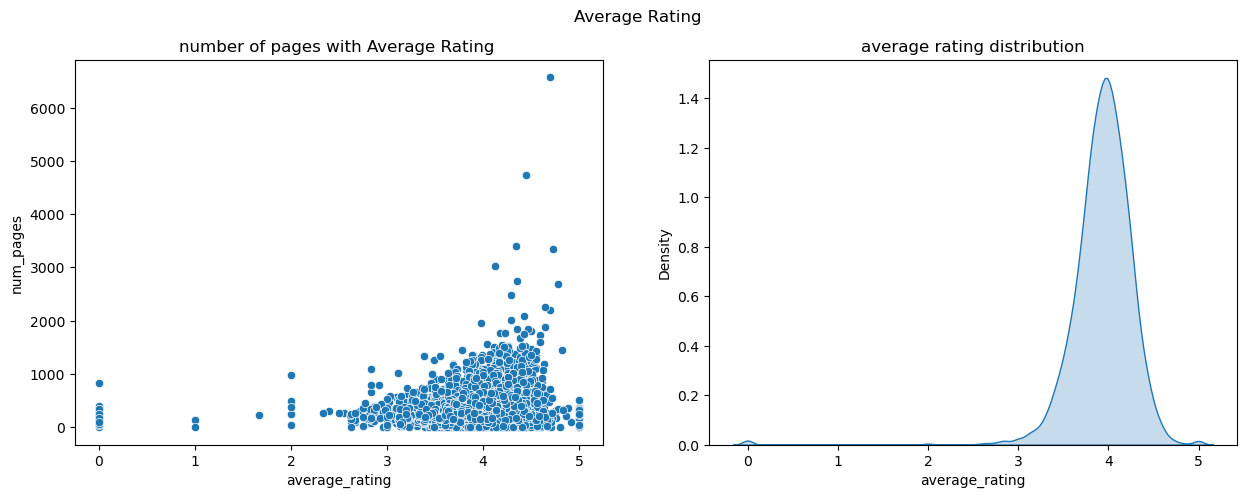

In [91]:
fig, axs = plt.subplots(1, 2, sharex=False, figsize=(15,5),sharey=False)
fig.suptitle('Average Rating\n')

axs[0].set_title("number of pages with Average Rating ")
sns.scatterplot(x='average_rating',y = "num_pages",ax=axs[0],data=df)


sns.kdeplot(df['average_rating'], shade = True,ax=axs[1])
axs[1].set_title("average rating distribution")


* Average rating with publication months and years

Text(0.5, 1.0, 'average rating distribution')

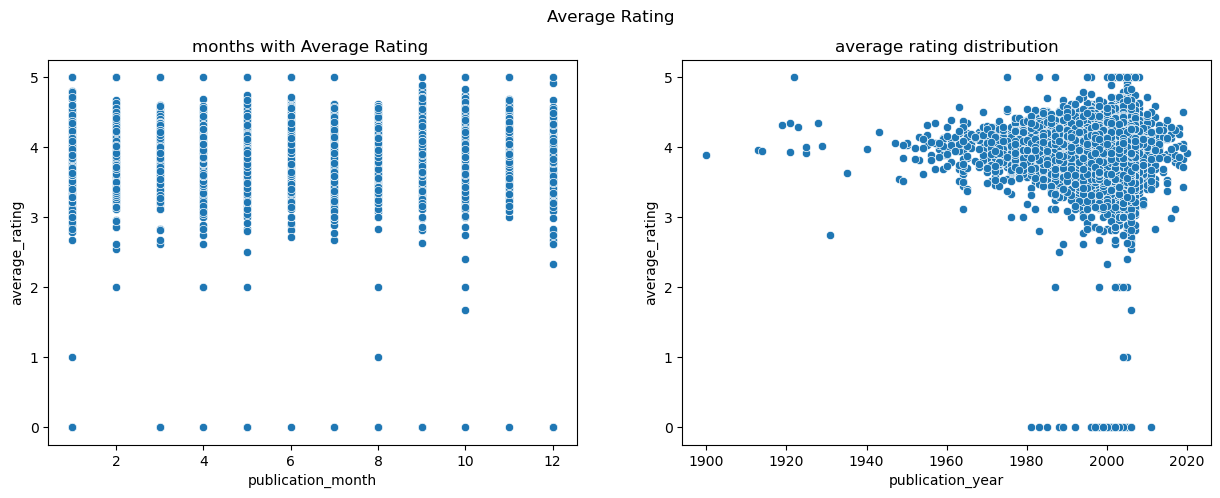

In [113]:
fig2, axs2 = plt.subplots(1, 2, sharex=False, figsize=(15,5),sharey=False)
fig2.suptitle('Average Rating\n')

axs2[0].set_title("months with Average Rating ")
sns.scatterplot(y='average_rating',x = 'publication_month',ax=axs2[0],data=df)


sns.scatterplot(y='average_rating',x = 'publication_year',ax=axs2[1],data=df)
axs2[1].set_title("average rating distribution")


* Data grouping function

In [92]:
def group(df, index, values, sort):
    # Use named aggregation
    named_agg = {f"{key}_{val}": (key, val) for key, val_list in values.items() for val in val_list}
    
    table = df.copy().groupby(index).agg(**named_agg)
    return table.sort_values(by=sort, ascending=False).reset_index()

* Most reviewed authors and books

In [93]:
df_popular_authors=group(df,"authors",{"average_rating":["mean"],"ratings_count":["sum"]},"ratings_count_sum").head(10)
df_popular_books=group(df,"title",{"average_rating":["mean"],"ratings_count":["sum"]},"ratings_count_sum").head(10)

In [94]:

fig_authors = px.bar(df_popular_authors, y='ratings_count_sum', x='authors',hover_data=['average_rating_mean'],color_discrete_sequence=['darkblue'])
fig_books = px.bar(df_popular_books, y='ratings_count_sum', x='title',hover_data=['average_rating_mean'],color_discrete_sequence=['crimson'])


subplot_fig = make_subplots(rows=1, cols=2)


subplot_fig.add_trace(fig_authors.data[0], row=1, col=1)
subplot_fig.add_trace(fig_books.data[0], row=1, col=2)

subplot_fig.update_layout(title_text="popular authors and books",title_x=0.4)
subplot_fig.update_layout(font=dict(size=9))

subplot_fig.show()

* Top publishers with the most book titles 

In [114]:
df_pulisher=group(df,"publisher",{"average_rating":["mean"],"title":["count"]},"title_count").head(10)


In [116]:
px.bar(df_pulisher, y='title_count', x='publisher',hover_data=['average_rating_mean'],color_discrete_sequence=['darkblue'])

* language code distribution 

In [108]:
df_lang=group(df,"language_code",{"average_rating":["mean"],"title":["count"]},"title_count")
df_lang['grouped_language'] = df_lang['language_code'].apply(lambda x: x if x == 'eng' else 'other')
df_lang_grouped = df_lang.groupby('grouped_language').agg({'title_count': 'sum'}).reset_index()


In [110]:
fig_lang=px.pie(df_lang_grouped, names='grouped_language',values='title_count', title='Dominance of English Language',color='grouped_language',
             color_discrete_map={ 'eng': 'darkblue','other': 'crimson'})
fig_lang.show()


* Average rating classes and review counts

In [97]:
df_rating=group(df,df.average_rating.round().astype(int),{"title":["count"],"ratings_count":["mean"]},"title_count")

In [98]:
df_rating

,average_rating,title_count,ratings_count_mean
0,4,10201,18724.789138
1,3,696,4671.323276
2,5,189,28095.497354
3,0,25,0.000000
4,2,10,543.200000
5,1,2,1.500000


* Correlation matrix

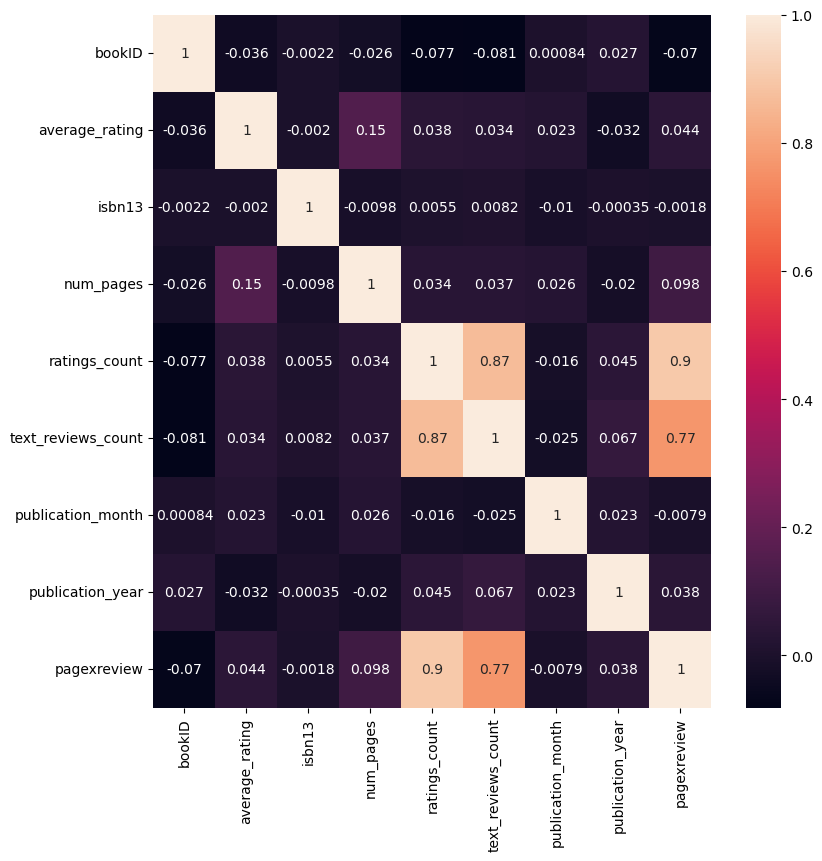

In [120]:
plt.figure(figsize=(9,9))
sns.heatmap(df.corr(),annot=True)
plt.show()